# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [11]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [12]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [13]:
A@e_1

array([1, 4, 7])

For e_1, the values in the first column get selected since the vector only has a non-zero value in the first value. The others turn to 0, and when adding all the values in the row together, only the value in the first column remains for all rows. 

In [14]:
A@e_2

array([2, 5, 8])

For e_2, the values in the second column get selected since the vector only has a non-zero value in the second value. The others turn to 0, and when adding all the values in the row together, only the value in the second column remains for all rows. 

In [15]:
A@e_3

array([3, 6, 9])

For e_3, the values in the third column get selected since the vector only has a non-zero value in the third value. The others turn to 0, and when adding all the values in the row together, only the value in the third column remains for all rows. 

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [16]:
u = np.ones(3)

In [17]:
A@u

array([ 6., 15., 24.])

Now, each value in each row is multiplied by 1, since each value in the row corresponds to a 1 in the u vector. WHen each of the rows are added together, it results  in the sum of each row corrseponding to the value in the final vector

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [18]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [19]:
A@x

array([-2,  4, 11])

A times x results in x. THe same would happen for any vactor multiplied by an identiy matrix. Each row only has a nonzero value in the vector value corresponding to the row number. So when the values in the rows are added together, the only value remaining is the original values from the x vector. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [20]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [21]:
A@x

array([11, -2,  4])

The order of the row numbers and the value in the vector that it corresponds to is now mixed up, so the final vector changes the position of the values in the vector x. 

In [22]:
A = np.array([ [0,1,0],
              [1,0,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [23]:
A@x

array([ 4, -2, 11])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [24]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [25]:
A@e_1

array([0.50052958, 0.02574731, 0.47372311])

All rows in the first column are kept in the resulting vecotr

In [26]:
A@e_2

array([0.24049286, 0.39251588, 0.36699127])

All rows in the second column are kept in the resulting vecotr

In [27]:
A@e_3

array([0.18358131, 0.37907577, 0.43734292])

All rows in the third column are kept in the resulting vecotr

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [28]:
Ae1 = A@e_1
Ae2 = A@Ae1
Ae3 = A@Ae2
Ae4 = A@Ae3
Ae5 = A@Ae4
print(Ae1)
print(Ae2)
print(Ae3)
print(Ae4)
print(Ae5)

[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]


In [29]:
Ae1 = A@e_2
Ae2 = A@Ae1
Ae3 = A@Ae2
Ae4 = A@Ae3
Ae5 = A@Ae4
print(Ae1)
print(Ae2)
print(Ae3)
print(Ae4)
print(Ae5)

[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]


In [30]:
Ae1 = A@e_3
Ae2 = A@Ae1
Ae3 = A@Ae2
Ae4 = A@Ae3
Ae5 = A@Ae4
print(Ae1)
print(Ae2)
print(Ae3)
print(Ae4)
print(Ae5)

[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


For each starting vector, it appears as if the values are converging to a value.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [2]:
import pandas as pd
import numpy as np

In [3]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [4]:
T

array([[0.25, 0.5 ],
       [0.75, 0.5 ]])

In [6]:
init_condition = np.array([1,0])
print(init_condition)

[1 0]


In [7]:
p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


p_1 = [(0.25\*1+0.5\*0), (0.75\*1+0.5\*0)]

In [8]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


each value in p_2 corresponds to a row and the value is 0.25 of the value in the first column + 0.75 the value in the second column

In [9]:
p_3 = T @ p_2
print(p_3)

[0.390625 0.609375]


In [33]:
p_4 = T @ p_3
print(p_4)
p_5 = T @ p_4
print(p_5)
p_6 = T @ p_5
print(p_6)
p_7 = T @ p_6
print(p_7)
p_8 = T @ p_7
print(p_8)
p_9 = T @ p_8
print(p_9)
p_10 = T @ p_9
print(p_10)
p_11 = T @ p_10
print(p_11)
p_12 = T @ p_11
print(p_12)
p_13 = T @ p_12
print(p_13)

[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]


For initial condition [1,0] it appears to settle down at [0.4, 0.6]

In [34]:
init_condition = np.array([0,1])
print(init_condition)
p_1 = T @ init_condition
print(p_1)
p_2 = T @ p_1
print(p_2)
p_3 = T @ p_2
print(p_3)
p_4 = T @ p_3
print(p_4)  
p_5 = T @ p_4
print(p_5)
p_6 = T @ p_5
print(p_6)
p_7 = T @ p_6
print(p_7)
p_8 = T @ p_7
print(p_8)
p_9 = T @ p_8
print(p_9)
p_10 = T @ p_9
print(p_10)
p_11 = T @ p_10
print(p_11)
p_12 = T @ p_11
print(p_12)
p_13 = T @ p_12
print(p_13)

[0 1]
[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]


For initial condition [0,1] it also appears to settle down at [0.4, 0.6]

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [35]:
weather = pd.read_csv('cville_weather.csv')

In [36]:
weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

There appears to be quite a few missing values. Some columns "missingness" are expected. For example countss of a column and its attribute (like DAPR and DAPR_attributes) across all column pairs have the same number of missing values. What 's interesting is that both DAPR and MDPR pairs have the same number of missing values. 

In [40]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)

In [38]:
states = [0,1]
seq = weather['rain']

In [39]:
## Create a S X S transition matrix, and find the transition counts:
S = len(states)
T = len(seq)
tr_counts = np.zeros( (S, S) )

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = seq[t-1] # previous state
    x_t = seq[t] # current state
    # Determine transition indices:
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    # Update transition counts:
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

tr_pr_1 = tr_pr # Save transition matrix for later

print(f'\nTransition Proportions:')
pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)


Transition Counts:
 [[169.  63.]
 [ 62. 116.]]

State Counts: 
 [[232.]
 [178.]]

State proportions: 
 [[0.56585366]
 [0.43414634]]

Transition Proportions:


,0,1
0,0.73,0.27
1,0.35,0.65


If it was rainy yesterday, there's a 65% chance it'll be rainy today and a 35% chance it will be clear. 

In [46]:
np.random.seed(100)

initial_state = 0 # clear
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

for k in range(21):
    density = tr_pr_1 @ density
    print(density)

Transition matrix:
 [[0.72844828 0.27155172]
 [0.34831461 0.65168539]] 

Initial Density:
 [[1.]
 [0.]] 

[0.72844828 0.34831461]
[0.62522232 0.48072072]
[0.58598266 0.53105274]
[0.57106635 0.55018563]
[0.56539615 0.55745869]
[0.56324072 0.56022342]
[0.56242137 0.56127439]
[0.56210991 0.5616739 ]
[0.56199151 0.56182577]
[0.5619465 0.5618835]
[0.56192939 0.56190544]
[0.56192289 0.56191378]
[0.56192042 0.56191696]
[0.56191948 0.56191816]
[0.56191912 0.56191862]
[0.56191898 0.56191879]
[0.56191893 0.56191886]
[0.56191891 0.56191888]
[0.5619189  0.56191889]
[0.5619189 0.5619189]
[0.5619189 0.5619189]


It coverges to a fixed result at day 20

In [47]:
np.random.seed(100)

initial_state = 1 # rain
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

for k in range(21):
    density = tr_pr_1 @ density
    print(density)

Transition matrix:
 [[0.72844828 0.27155172]
 [0.34831461 0.65168539]] 

Initial Density:
 [[0.]
 [1.]] 

[0.27155172 0.65168539]
[0.37477768 0.51927928]
[0.41401734 0.46894726]
[0.42893365 0.44981437]
[0.43460385 0.44254131]
[0.43675928 0.43977658]
[0.43757863 0.43872561]
[0.43789009 0.4383261 ]
[0.43800849 0.43817423]
[0.4380535 0.4381165]
[0.43807061 0.43809456]
[0.43807711 0.43808622]
[0.43807958 0.43808304]
[0.43808052 0.43808184]
[0.43808088 0.43808138]
[0.43808102 0.43808121]
[0.43808107 0.43808114]
[0.43808109 0.43808112]
[0.4380811  0.43808111]
[0.4380811 0.4380811]
[0.4380811 0.4380811]


This also converges to a fxied result at day 20

In [49]:
import seaborn as sns

<Axes: xlabel='PRCP', ylabel='Density'>

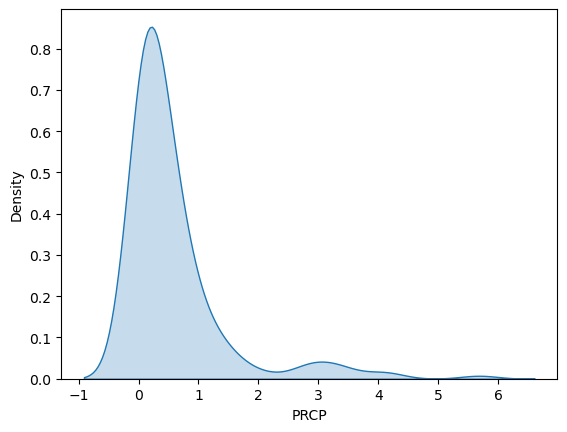

In [51]:
sns.kdeplot(data=weather[weather['rain'] == 1], x='PRCP', fill=True)

One improvement is to increase the statespace so that instead of just one state, we are looking at transitions between pairs of states (representing 2 days). This should help provide more nuance to the prediction if we have knowlege of the last day and the day before before trying to determine the probability of a certain outcom today. For example, the modified state space would be [00,01,10,11]

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [85]:
import pickle


In [87]:
with open('taxicab.pkl', 'rb') as f:
    taxi = pickle.load(f)

In [89]:
[np.unique(trip) for trip in taxi]

[array(['Battery Park City', 'Central Park', 'Chelsea', 'Chinatown',
        'Civic Center', 'East Harlem', 'East Village',
        'Financial District', 'Flatiron District', 'Gramercy',
        'Greenwich Village', 'Harlem', "Hell's Kitchen", 'Inwood',
        'Kips Bay', 'Little Italy', 'Lower East Side', 'Midtown',
        'Morningside Heights', 'Murray Hill', 'NoHo', 'Nolita',
        'Outside Manhattan', 'Roosevelt Island', 'SoHo', 'Stuyvesant Town',
        'Theater District', 'Tribeca', 'Two Bridges', 'Upper East Side',
        'Upper West Side', 'Washington Heights', 'West Village'],
       dtype=object),
 array(['Battery Park City', 'Central Park', 'Chelsea', 'Chinatown',
        'Civic Center', 'East Harlem', 'East Village',
        'Financial District', 'Flatiron District', 'Gramercy',
        'Greenwich Village', 'Harlem', "Hell's Kitchen", 'Inwood',
        'Kips Bay', 'Little Italy', 'Lower East Side', 'Marble Hill',
        'Midtown', 'Morningside Heights', 'Murray Hill'

state space

In [94]:
states = set()
for trip in taxi:
    new_states = set(trip)
    states = states.union(new_states)

In [98]:
states = list(states)

In [99]:
print('States:\n', np.array(states) )

States:
 ['SoHo' 'Murray Hill' 'Morningside Heights' 'Chinatown' 'Upper East Side'
 'Gramercy' 'West Village' 'Central Park' 'Battery Park City'
 'Lower East Side' 'Marble Hill' 'Inwood' 'Outside Manhattan'
 'Washington Heights' 'Roosevelt Island' 'Upper West Side' 'Tribeca'
 'Flatiron District' 'Two Bridges' 'Liberty Island' 'Chelsea' 'Nolita'
 "Randall's Island" 'East Village' 'Midtown' 'NoHo' 'Stuyvesant Town'
 'Financial District' 'Civic Center' 'Little Italy' 'East Harlem'
 'Theater District' 'Governors Island' 'Ellis Island' 'Greenwich Village'
 'Harlem' 'Kips Bay' "Hell's Kitchen"]


In [100]:
S = len(states)
T = len(taxi)
tr_counts = np.zeros( (S, S) )

In [101]:
for trip in taxi:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)


Transition Counts:
 [[138632.   7135.    550. ...    852.   5776.  13241.]
 [  8504. 128013.    670. ...   1150.  44548.  16707.]
 [   618.    894.  32397. ...  19463.    642.   5081.]
 ...
 [  1507.   1822.   9898. ...  46585.   1531.  10729.]
 [  6561.  37053.    541. ...    969.  97873.  10552.]
 [ 12985.  19197.   6207. ...   8910.  11377. 346322.]]
State proportions: 

Transition Proportions:

                     SoHo  Murray Hill  Morningside Heights  Chinatown  \
SoHo                 0.25         0.01                 0.00       0.01   
Murray Hill          0.01         0.20                 0.00       0.00   
Morningside Heights  0.00         0.01                 0.20       0.00   
Chinatown            0.05         0.01                 0.00       0.13   
Upper East Side      0.01         0.02                 0.00       0.00   
Gramercy             0.02         0.04                 0.00       0.00   
West Village         0.06         0.01                 0.00       0.00   
Centra

In [102]:
import matplotlib.pyplot as plt

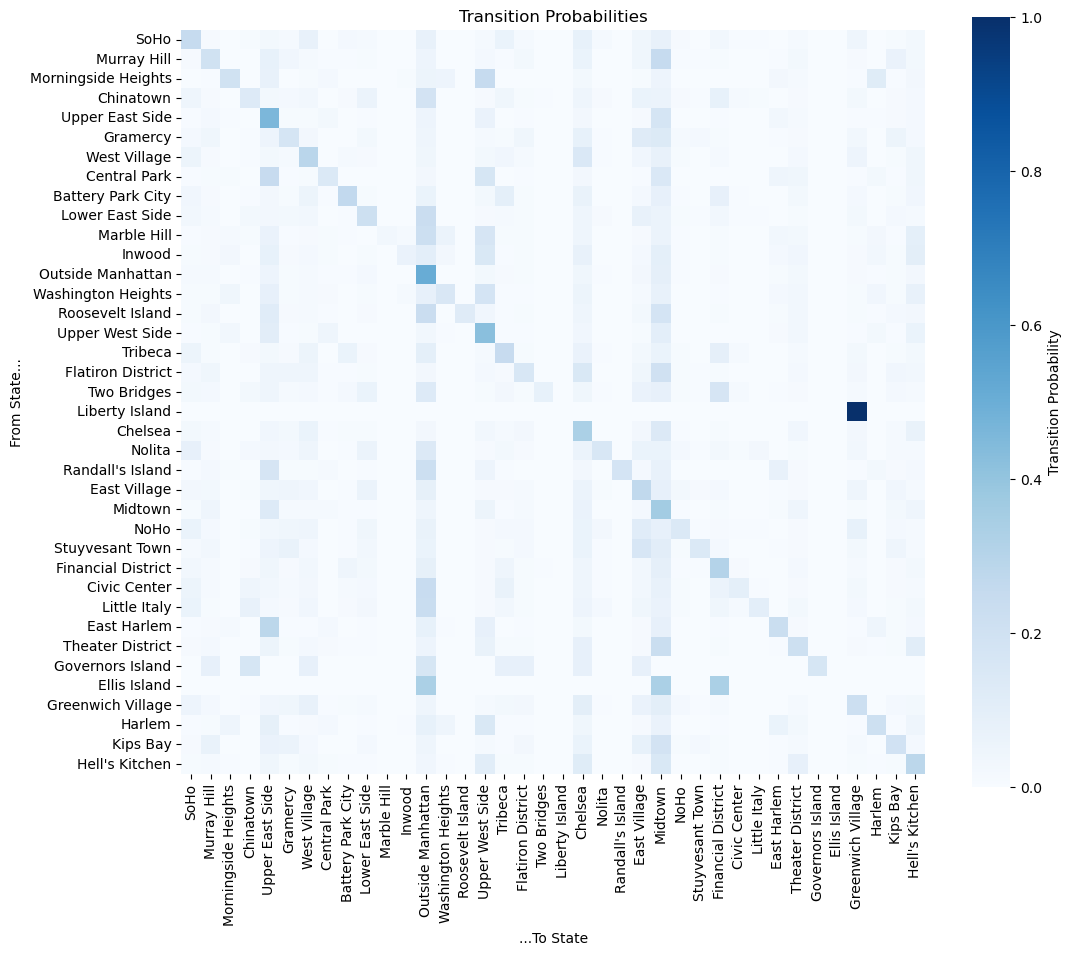

In [103]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

The m ost common route is liberty island to greenwixh village. other common routes are upper east side to upper east side, outside manhattan to outside manhattan, and upper west side to upper west side.

Taxi rides are order 1 because each taxi ride is independent. Each ride has a new person and their ride is not dependent on whatver the trip was for the last person. 

In [107]:
np.random.seed(100) 
initial_state = "Hell's Kitchen" # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 
n_sim = 2

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = pr_t / pr_t.sum()    # Normalize to sum to 1
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation
print(simulation)




Initial state: Hell's Kitchen
["Hell's Kitchen", 'Nolita']


In [ ]:
np.random.seed(100) 
initial_state = "Hell's Kitchen" 
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 
n_sim = 3

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = pr_t / pr_t.sum()    # Normalize to sum to 1
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation
print(simulation)




Initial state: Hell's Kitchen
["Hell's Kitchen", 'Nolita', 'Nolita']


In [ ]:
np.random.seed(100) 
initial_state = "Hell's Kitchen"
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 
n_sim = 5

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = pr_t / pr_t.sum()    # Normalize to sum to 1
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation
print(simulation)




Initial state: Hell's Kitchen
["Hell's Kitchen", 'Nolita', 'Nolita', 'Nolita', 'Stuyvesant Town']


In [ ]:
np.random.seed(100) 
initial_state = "Hell's Kitchen" 
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 
n_sim = 10

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = pr_t / pr_t.sum()    # Normalize to sum to 1
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation
print(simulation)




Initial state: Hell's Kitchen
["Hell's Kitchen", 'Nolita', 'Nolita', 'Nolita', 'Stuyvesant Town', 'SoHo', 'SoHo', 'East Village', 'Little Italy', 'Lower East Side']


In [112]:
np.random.seed(100) 
initial_state = "Midtown" 
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 
n_sim = 20

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = pr_t / pr_t.sum()    # Normalize to sum to 1
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation
print(simulation)




Initial state: Midtown
['Midtown', 'East Village', 'Outside Manhattan', 'Roosevelt Island', 'Roosevelt Island', 'Upper East Side', 'Upper East Side', "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island", "Randall's Island"]


For cabs starting in midtown, they spend most of their time in Randall's Island